# `rgcam`: An R Package for Extracting and Importing GCAM Data
## Maridee Weber

# Overview
The `rgcam` package provides functions for extracting GCAM data from GCAM output databases and importing it into R for analysis. This notebook demonstrates the primary `rgcam` features; more information can be found on the [rgcam GitHub page](https://github.com/JGCRI/rgcam).  


# Getting started
To use `rgcam` you need a GCAM output database and an XML file containing the queries you want to extract from the database. These queries are modified versions of the queries used in Model Interface.
- After running GCAM, your GCAM database can be found in *your_GCAM_Workspace/output*
- Model Interface queries can be found in *your_GCAM_Workspace/output/queries/Main_queries.xml*


## Modifying Model Interface queries
To modify a model interface query to work with `rgcam`, you:
1) Copy + paste the query you want from *Main_queries.xml* into a blank XML
2) Add regions to extract data for
3) Add `<aQuery>` before, and `</aQuery>` after
4) Add `<queries>` at the beginning of your XML, and `</queries>` at the end of your XML
5) Save your XML
   

### Example
Here is the query for "population by region" in *Main_queries.xml*

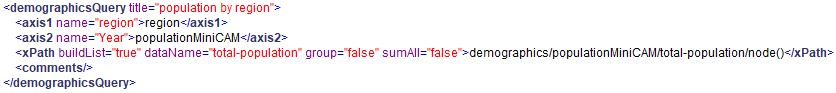

The modified version for `rgcam` would look like this, where GCAM region "Africa_Southern" has been added to extract data for, and `<aQuery>` and `<queries>` tags have been added.

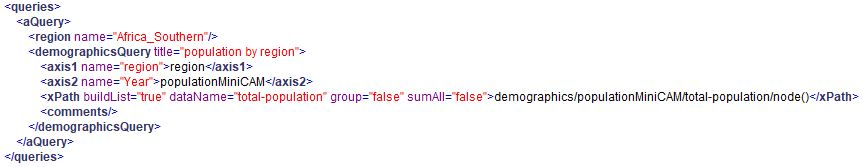

Your `rgcam` query XML can contain more than one query, too. Having multiple queries would look like this, where the "elec gen by subsector" query has been added for "all-regions". This means that `rgcam` will extract the data from this query for each GCAM region. Note that the individual queries begin and end with the `<aQuery>` tags, but that the `<queries>` tag is only needed at the beginning and end of the XML. 

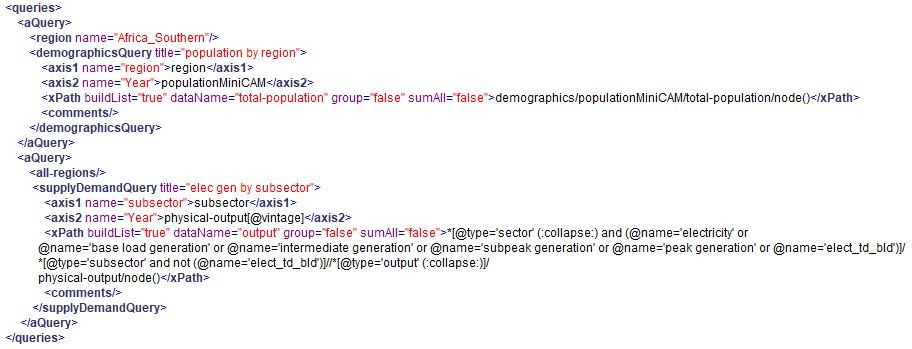

Finally, each of your queries can contain multiple regions, like this. If GCAM-USA was run, US states can be listed to extract data for the individual states.

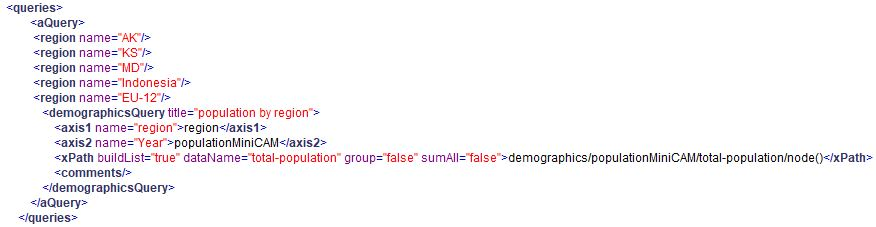

Once your query file is made, you can use `rgcam`.


# Using `rgcam`


## Connecting your database
The first step to using `rgcam` is to connect it to you GCAM database.


In [1]:
library(rgcam)

host <- "localhost"
conn <- remoteDBConn('gcamv71_training_basexdb', 'training', 'training', host)

# For databases that are on your local machine, you can use conn <- localDBConn("path_to_database", "name_of_database")
# To connect multiple databases, you can use
# conn1 <- localDBConn("path_to_database1", "name_of_database1")
# conn2 <- localDBConn("path_to_database2", "name_of_database2")

Database scenarios:  GCAM, GCAM_SSP3



The *remoteDBConn* function connects your remote database to R, and running this line tells you which scenario(s) are in your database. In our database, called "gcamv71_training_basexdb", we have two scenarios: **GCAM**, and **GCAM_SSP3**


## Adding your database to a project file
Once your database is connected to R, you can use the `addScenario` function to extract the data from your scenario(s) and create a data file to save them. Depending on the number of queries and regions data is being extracted for, this step can take some time.


In [2]:
# addScenario(database object, `name of file to store rgcam data`, `path to/name of query XML`, `name of scenario`)
# There are two scenarios, so you use this function twice.
prj <- addScenario(conn, "rgcam_training", queryFile = "../data/queries.xml", scenario = "GCAM", clobber = TRUE)
prj <- addScenario(conn, "rgcam_training", queryFile = "../data/queries.xml", scenario = "GCAM_SSP3", clobber = TRUE)

# For scenarios in different databases, you can use
# prj <- addScenario(conn1, "rgcam_training", queryFile = "../data/queries.xml", scenario = "Scenario1", clobber = TRUE)
# prj <- addScenario(conn2, "rgcam_training", queryFile = "../data/queries.xml", scenario = "Scenario2", clobber = TRUE)

After connecting your database and using the `addScenario` function to save GCAM output data to a project file for the first time, you can load your project in `rgcam` the next time using the `loadProject` function. This saves time, as it simply loads the data that has been queried previously without having to reconnect your database and add your scenarios.


In [3]:
prj <- loadProject('rgcam_training')

## Retrieving your queries
To retrieve your queries to be able to view the data in R, you can use the `getQuery` function. You assign each query to a dataframe, and use the title of the query from your `rgcam` query XML.


In [4]:
# getQuery(project object, `query title from XML`)
population <- getQuery(prj, "population by region")
electricity_generation <- getQuery(prj, "elec gen by subsector")

You are now able to view your GCAM output and use it for analysis and visualization through `rchart`, `rmap`, `ggplot2`, or another tool of your choosing.


In [5]:
View(population)

Units,scenario,region,year,value
<chr>,<chr>,<chr>,<dbl>,<dbl>
thous,GCAM,Africa_Eastern,1975,91890
thous,GCAM,Africa_Eastern,1990,145593
thous,GCAM,Africa_Eastern,2005,222829
thous,GCAM,Africa_Eastern,2010,255333
thous,GCAM,Africa_Eastern,2015,292560
thous,GCAM,Africa_Eastern,2020,327652
thous,GCAM,Africa_Eastern,2025,363312
thous,GCAM,Africa_Eastern,2030,398928
thous,GCAM,Africa_Eastern,2035,433912


In [6]:
View(electricity_generation)

Units,scenario,region,subsector,year,value
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
EJ,GCAM,Africa_Eastern,biomass,1990,0.00129301
EJ,GCAM,Africa_Eastern,biomass,2005,0.00210229
EJ,GCAM,Africa_Eastern,biomass,2010,0.00273200
EJ,GCAM,Africa_Eastern,biomass,2015,0.00243691
EJ,GCAM,Africa_Eastern,biomass,2020,0.00435397
EJ,GCAM,Africa_Eastern,biomass,2025,0.01075513
EJ,GCAM,Africa_Eastern,biomass,2030,0.02786302
EJ,GCAM,Africa_Eastern,biomass,2035,0.05595530
EJ,GCAM,Africa_Eastern,biomass,2040,0.10227130



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




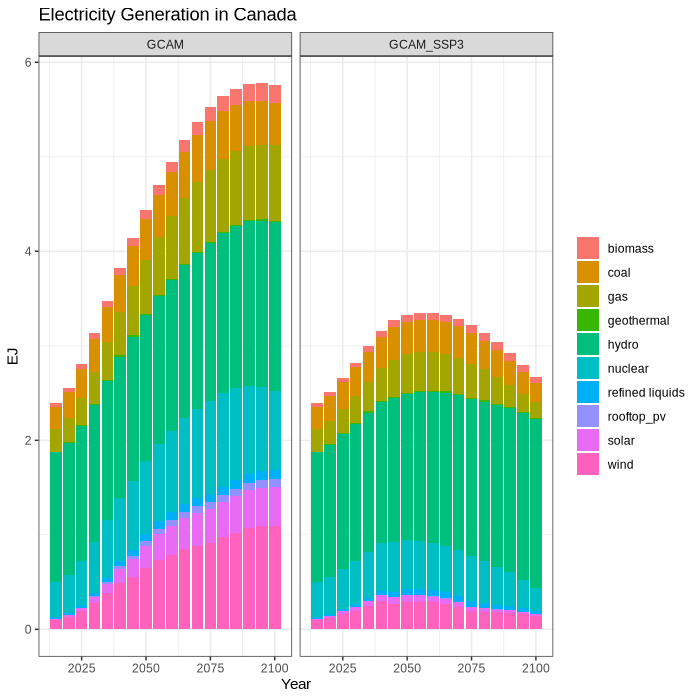

In [7]:
# plotting example
library(ggplot2)
library(dplyr)

electricity_generation %>%
    filter(region == "Canada", year >2010) %>%
    ggplot(aes(x = year, y = value, fill = subsector)) +
    geom_bar(stat = "identity") +
    facet_wrap(~scenario) +
    labs(title = "Electricity Generation in Canada", x = "Year", y = "EJ") +
    theme_bw() +
    theme(legend.title = element_blank())

options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 100)